#### Load packages

In [1]:
library('tidyverse')
library('janitor')
library('dplyr')
library('ggplot2')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




#### Read data and explore

In [2]:
depression <- read.csv('/kaggle/input/depression-surveydataset-for-analysis/final_depression_dataset_1.csv')
head(depression)
glimpse(depression)

Name    Gender Age City      Working.Professional.or.Student
1 Pooja   Female 37  Ghaziabad Working Professional           
2 Reyansh Male   60  Kalyan    Working Professional           
3 Manvi   Female 42  Bhopal    Working Professional           
4 Isha    Female 44  Thane     Working Professional           
5 Aarav   Male   48  Indore    Working Professional           
6 Sanya   Female 60  Bhopal    Working Professional           
  Profession        Academic.Pressure Work.Pressure CGPA Study.Satisfaction
1 Teacher           NA                2             NA   NA                
2 Financial Analyst NA                4             NA   NA                
3 Teacher           NA                2             NA   NA                
4 Teacher           NA                3             NA   NA                
5 UX/UI Designer    NA                4             NA   NA                
6 Civil Engineer    NA                1             NA   NA                
  Job.Satisfaction Sleep.Duration Dietary.Habits Degree
1 4                7-8 hours      Moderate       MA    
2 3                5-6 hours      Unhealthy      B.Com 
3 3                5-6 hours      Moderate       M.Com 
4 5                7-8 hours      Healthy        MD    
5 3                7-8 hours      Moderate       BE    
6 4                7-8 hours      Unhealthy      MCA   
  Have.you.ever.had.suicidal.thoughts.. Work.Study.Hours Financial.Stress
1 No                                     6               2               
2 Yes                                    0               4               
3 No                                     0               2               
4 Yes                                    1               2               
5 Yes                                    6               5               
6 Yes                                   12               3               
  Family.History.of.Mental.Illness Depression
1 No                               No        
2 Yes                              No        
3 No                               No        
4 Yes                              No        
5 Yes                              No        
6 Yes                              No

Rows: 2,556
Columns: 19
$ Name                                  <chr> "Pooja", "Reyansh", "Manvi", "Is…
$ Gender                                <chr> "Female", "Male", "Female", "Fem…
$ Age                                   <int> 37, 60, 42, 44, 48, 60, 30, 30, …
$ City                                  <chr> "Ghaziabad", "Kalyan", "Bhopal",…
$ Working.Professional.or.Student       <chr> "Working Professional", "Working…
$ Profession                            <chr> "Teacher", "Financial Analyst", …
$ Academic.Pressure                     <int> NA, NA, NA, NA, NA, NA, NA, NA, …
$ Work.Pressure                         <int> 2, 4, 2, 3, 4, 1, 4, 1, 1, 3, 2,…
$ CGPA                                  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, …
$ Study.Satisfaction                    <int> NA, NA, NA, NA, NA, NA, NA, NA, …
$ Job.Satisfaction                      <int> 4, 3, 3, 5, 3, 4, 2, 2, 2, 4, 5,…
$ Sleep.Duration                        <chr> "7-8 hours", "5-6 hours", "5-6 h…
$ Dietary.Habits

#### Applying clean_names, Renaming Columns, Adjusting Variables to Appropriate Types and add a New Column 

In [3]:
depression_clean <- depression %>%
  clean_names() %>%  # Clean column names
  rename(            # Renaming columns
    suicidal_thoughts = have_you_ever_had_suicidal_thoughts,
    fam_hist_mental_illness = family_history_of_mental_illness,
    study_hours = work_study_hours,
    student = working_professional_or_student
  ) %>%
  mutate(  # Convert chr to factor
    gender = factor(gender), 
    dietary_habits = factor(dietary_habits), 
    fam_hist_mental_illness = factor(fam_hist_mental_illness),  
    study_satisfaction = factor(study_satisfaction),
    depression = factor(depression), 
    academic_pressure = factor(academic_pressure),
    financial_stress = factor(financial_stress)
  )%>%
  mutate( # Add a new column that indicates whether both the depression and suicidal_thoughts columns are marked as 'Yes'
    depression_suicidal = ifelse(depression == "Yes" & suicidal_thoughts == "Yes", "Yes", "No")  
  )

glimpse(depression_clean)
colnames(depression_clean)


Rows: 2,556
Columns: 20
$ name                    <chr> "Pooja", "Reyansh", "Manvi", "Isha", "Aarav", …
$ gender                  <fct> Female, Male, Female, Female, Male, Female, Fe…
$ age                     <int> 37, 60, 42, 44, 48, 60, 30, 30, 56, 35, 21, 57…
$ city                    <chr> "Ghaziabad", "Kalyan", "Bhopal", "Thane", "Ind…
$ student                 <chr> "Working Professional", "Working Professional"…
$ profession              <chr> "Teacher", "Financial Analyst", "Teacher", "Te…
$ academic_pressure       <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ work_pressure           <int> 2, 4, 2, 3, 4, 1, 4, 1, 1, 3, 2, 1, 3, 2, 3, 3…
$ cgpa                    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ study_satisfaction      <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ job_satisfaction        <int> 4, 3, 3, 5, 3, 4, 2, 2, 2, 4, 5, 2, 2, 3, 1, 3…
$ sleep_duration          <chr> "7-8 hours", "5-6 hours", "5-6 hours", "7-8 ho…
$ dietary_habits

[1] "name"                    "gender"                 
 [3] "age"                     "city"                   
 [5] "student"                 "profession"             
 [7] "academic_pressure"       "work_pressure"          
 [9] "cgpa"                    "study_satisfaction"     
[11] "job_satisfaction"        "sleep_duration"         
[13] "dietary_habits"          "degree"                 
[15] "suicidal_thoughts"       "study_hours"            
[17] "financial_stress"        "fam_hist_mental_illness"
[19] "depression"              "depression_suicidal"

#### Filter dataset to include only students and drop unnecessary columns

In [4]:
depression_clean <- depression_clean %>% 
  filter(student == "Student") %>%
  select(
      -"profession",
      -"work_pressure",
      -"job_satisfaction",
      -"city",
      -"degree",
      )

glimpse(depression_clean)


Rows: 502
Columns: 15
$ name                    <chr> "Advait", "Sanket", "Ranveer", "Gagan", "Tina"…
$ gender                  <fct> Male, Male, Male, Male, Female, Male, Female, …
$ age                     <int> 28, 28, 25, 23, 31, 19, 34, 20, 33, 33, 31, 24…
$ student                 <chr> "Student", "Student", "Student", "Student", "S…
$ academic_pressure       <fct> 2, 4, 1, 1, 1, 4, 4, 4, 1, 4, 5, 2, 5, 1, 5, 5…
$ cgpa                    <dbl> 6.51, 7.48, 7.21, 9.90, 5.97, 9.05, 9.96, 6.17…
$ study_satisfaction      <fct> 4, 5, 3, 4, 5, 4, 2, 1, 4, 3, 4, 1, 5, 1, 1, 3…
$ sleep_duration          <chr> "7-8 hours", "5-6 hours", "5-6 hours", "More t…
$ dietary_habits          <fct> Moderate, Healthy, Unhealthy, Unhealthy, Healt…
$ suicidal_thoughts       <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes…
$ study_hours             <int> 9, 7, 10, 7, 4, 1, 6, 3, 10, 10, 6, 11, 2, 12,…
$ financial_stress        <fct> 2, 1, 4, 2, 2, 4, 2, 4, 3, 1, 4, 5, 1, 3, 5, 3…
$ fam_hist_mental_

#### Check for missing values and duplicates 

In [5]:
#missing values
depression_clean %>% 
  is.na()%>%  #Check for NA (missing) values, creating a logical matrix
  colSums()   #Sum the TRUE values (which represent missing values) for each column

#duplicates
sum(duplicated(depression_clean)) #Count the number of duplicate rows

#summary statistics
summary(depression_clean)

name                  gender                     age 
                      0                       0                       0 
                student       academic_pressure                    cgpa 
                      0                       0                       0 
     study_satisfaction          sleep_duration          dietary_habits 
                      0                       0                       0 
      suicidal_thoughts             study_hours        financial_stress 
                      0                       0                       0 
fam_hist_mental_illness              depression     depression_suicidal 
                      0                       0                       0

[1] 0

     name              gender         age          student         
 Length:502         Female:235   Min.   :18.00   Length:502        
 Class :character   Male  :267   1st Qu.:22.00   Class :character  
 Mode  :character                Median :26.50   Mode  :character  
                                 Mean   :26.24                     
                                 3rd Qu.:30.00                     
                                 Max.   :34.00                     
 academic_pressure      cgpa        study_satisfaction sleep_duration    
 1: 99             Min.   : 5.030   1: 86              Length:502        
 2: 88             1st Qu.: 6.210   2:100              Class :character  
 3:125             Median : 7.605   3:103              Mode  :character  
 4: 92             Mean   : 7.568   4:116                                
 5: 98             3rd Qu.: 8.825   5: 97                                
                   Max.   :10.000                                        
   die

## Analyze and Share Phase
Organize and format the data to answer the questions. Perform calculations and identify trends and relationships within the data.

#### Gender Distribution

In [6]:
# Count occurrences of each gender
gender_count <- depression_clean %>%
  group_by(gender) %>%
  summarise(Count = n())%>%
  mutate(
      Percentage = (Count / sum(Count)) * 100
  )

# Display the count
print(gender_count)

# A tibble: 2 × 3
  gender Count Percentage
  <fct>  <int>      <dbl>
1 Female   235       46.8
2 Male     267       53.2


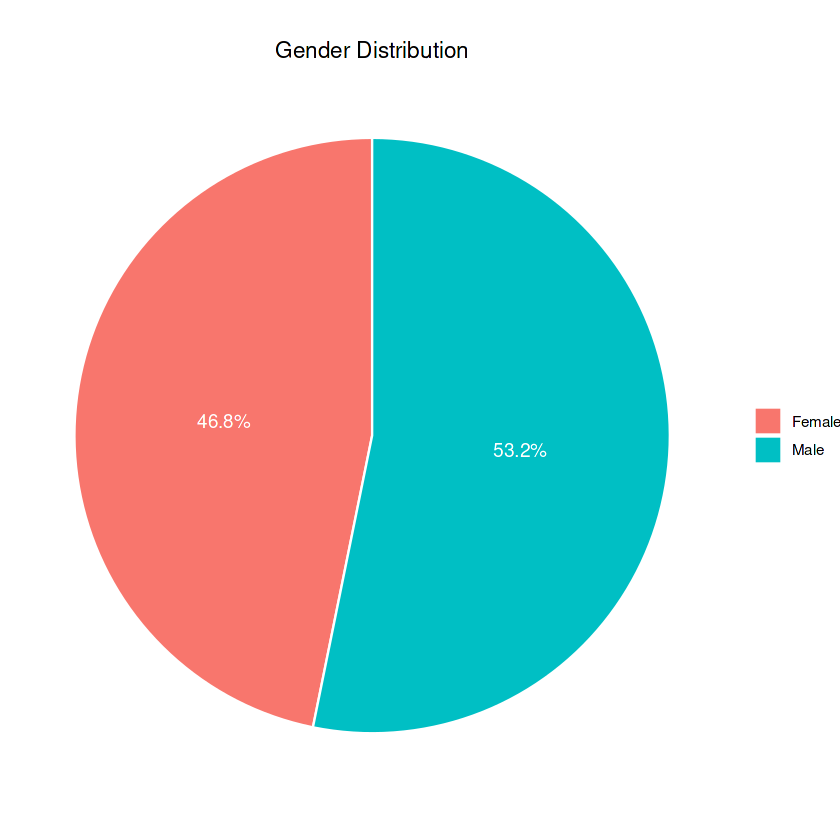

In [7]:
gender_count %>% 
  ggplot(aes(x = "", y = Percentage, fill = gender)) +   # Set x = "" to make it a single stacked bar
  geom_col(width = 1, color = "white")  +             # Creates the pie chart using a single column per gender.
  coord_polar("y", start = 0) +          # Convert bar chart to pie chart
  labs(
      title = "Gender Distribution"
  ) +               
  theme_void() +                         # Remove background and axes
  theme(
      plot.title = element_text(hjust = 0.5),  # Center the title
      legend.title = element_blank()        #Remove the legend title 
  ) +  
  geom_text(
      aes(label = paste0(round(Percentage, 1), "%")),    # Add percentages as labels
      position = position_stack(vjust = 0.5),    # Place the labels in the middle of each slice
      color = "white"
  )   

#### Age Distribution 

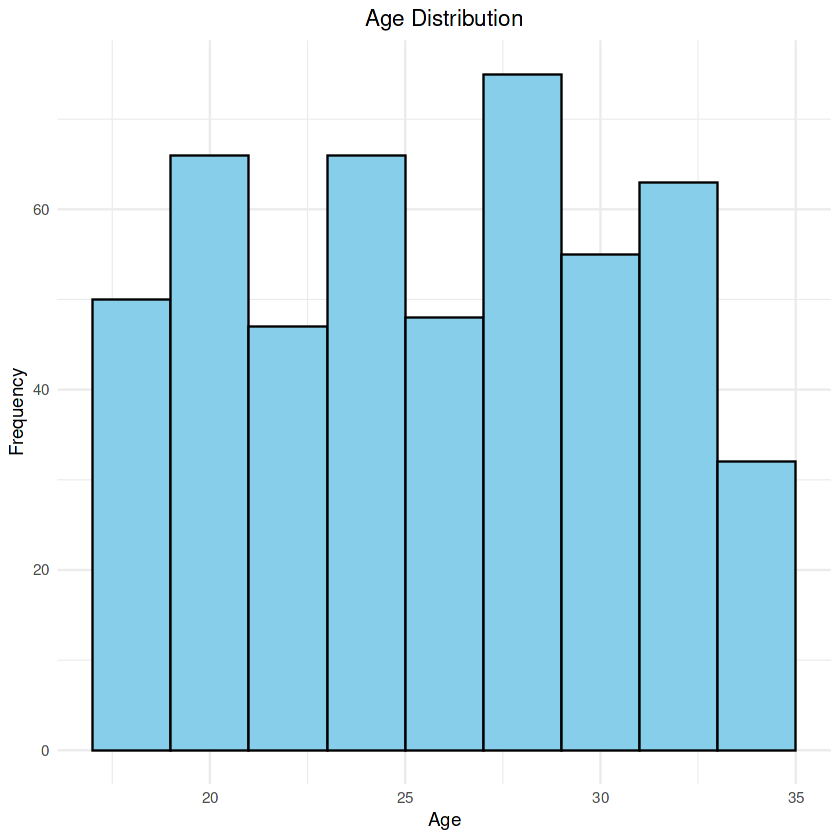

In [8]:
depression_clean%>%
ggplot(aes(x = age)) +
  geom_histogram(binwidth = 2, color = "black", fill = "skyblue") +  # Customize bin width and colors
  labs(
      title = "Age Distribution",
      x = "Age", 
      y = "Frequency"
  ) +  
  theme_minimal()+
  theme(
      plot.title = element_text(hjust = 0.5)
  ) 
 

#### Depression Distribution

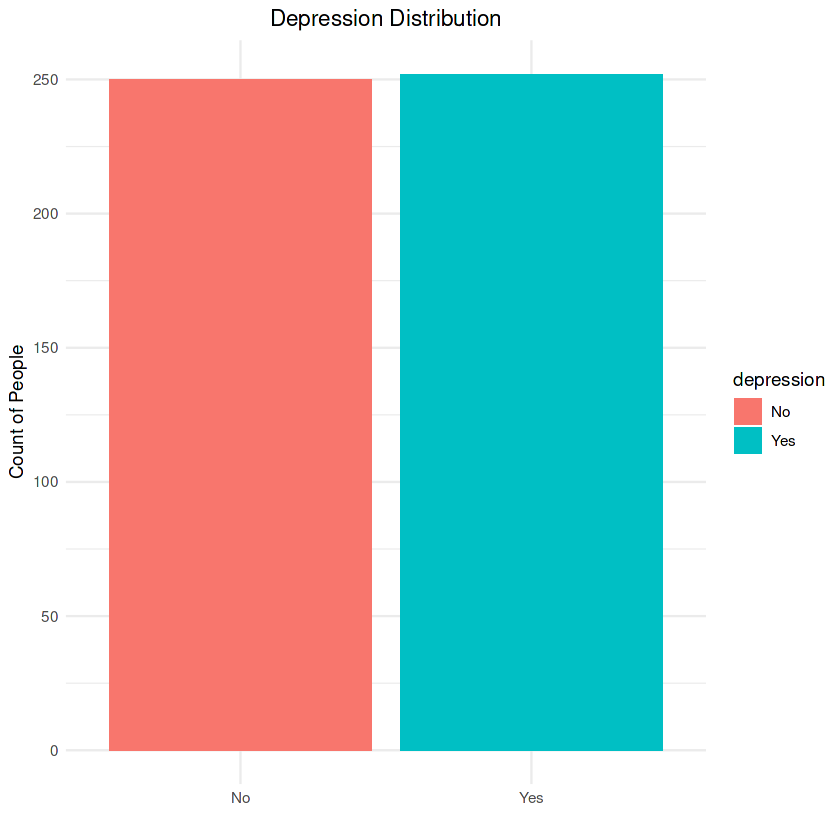

In [9]:
depression_clean %>% 
  ggplot(aes(x = depression, fill = depression)) +  # Color bars by depression status
  geom_bar(position = "dodge") +  # Use dodge position to separate the bars for each depression status
  labs(
      title = "Depression Distribution",
      x = "", 
      y = "Count of People"
  ) +
theme_minimal()+
  theme(
      plot.title = element_text(hjust = 0.5)
  ) 

#### Depression Across Different Age Groups

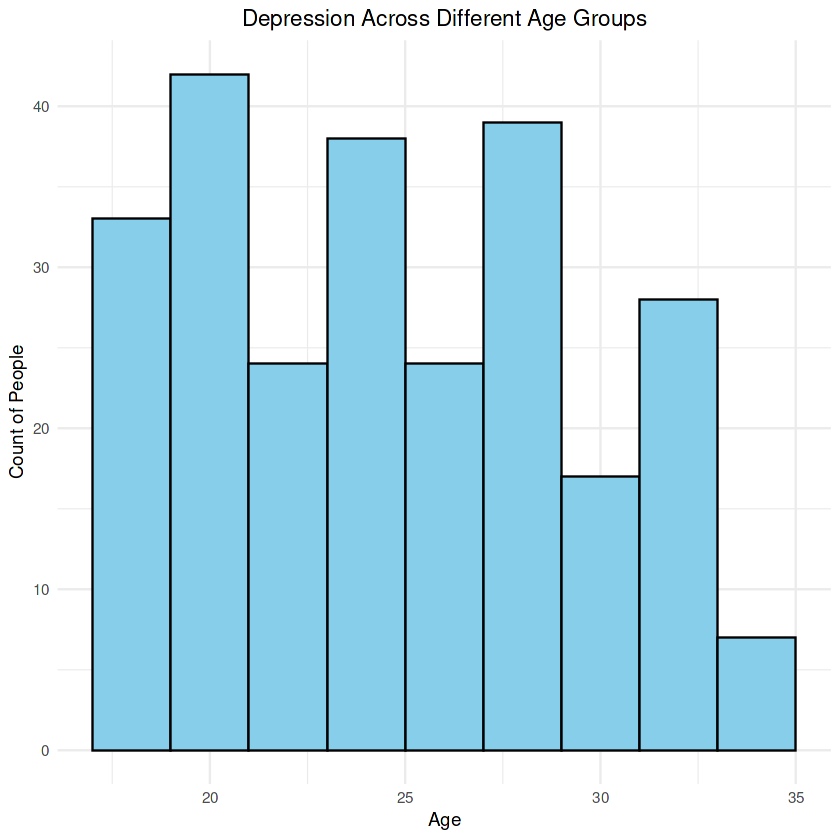

In [10]:
depression_clean%>%
  filter(depression == "Yes") %>%
  ggplot(aes(x = age)) +
  geom_histogram(binwidth = 2, color = "black", fill = "skyblue") +  # Customize bin width and colors
  labs(
      title = "Depression Across Different Age Groups",
      x = "Age",
      y = "Count of People"
  ) +  
  theme_minimal() + 
  theme(
      plot.title = element_text(hjust = 0.5)
  ) 
 

#### In order to better visualize the data I will categorize the age into four groups based on depression distribution, this will be very useful to quickly see patterns and visualize them:


In [11]:
# Define the age ranges and group them
depression_clean <- depression_clean %>%
  mutate(
    age_group = case_when(
      age >= 18 & age <= 22 ~ "18-22",
      age >= 23 & age <= 26 ~ "23-26",
      age >= 27 & age <= 30 ~ "27-30",
      age >= 31 & age <= 34 ~ "31-34"
    )
  )

glimpse(depression_clean)

Rows: 502
Columns: 16
$ name                    <chr> "Advait", "Sanket", "Ranveer", "Gagan", "Tina"…
$ gender                  <fct> Male, Male, Male, Male, Female, Male, Female, …
$ age                     <int> 28, 28, 25, 23, 31, 19, 34, 20, 33, 33, 31, 24…
$ student                 <chr> "Student", "Student", "Student", "Student", "S…
$ academic_pressure       <fct> 2, 4, 1, 1, 1, 4, 4, 4, 1, 4, 5, 2, 5, 1, 5, 5…
$ cgpa                    <dbl> 6.51, 7.48, 7.21, 9.90, 5.97, 9.05, 9.96, 6.17…
$ study_satisfaction      <fct> 4, 5, 3, 4, 5, 4, 2, 1, 4, 3, 4, 1, 5, 1, 1, 3…
$ sleep_duration          <chr> "7-8 hours", "5-6 hours", "5-6 hours", "More t…
$ dietary_habits          <fct> Moderate, Healthy, Unhealthy, Unhealthy, Healt…
$ suicidal_thoughts       <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes…
$ study_hours             <int> 9, 7, 10, 7, 4, 1, 6, 3, 10, 10, 6, 11, 2, 12,…
$ financial_stress        <fct> 2, 1, 4, 2, 2, 4, 2, 4, 3, 1, 4, 5, 1, 3, 5, 3…
$ fam_hist_mental_

#### Depressed Students with Suicidal Thoughts, Faceted by Age Group

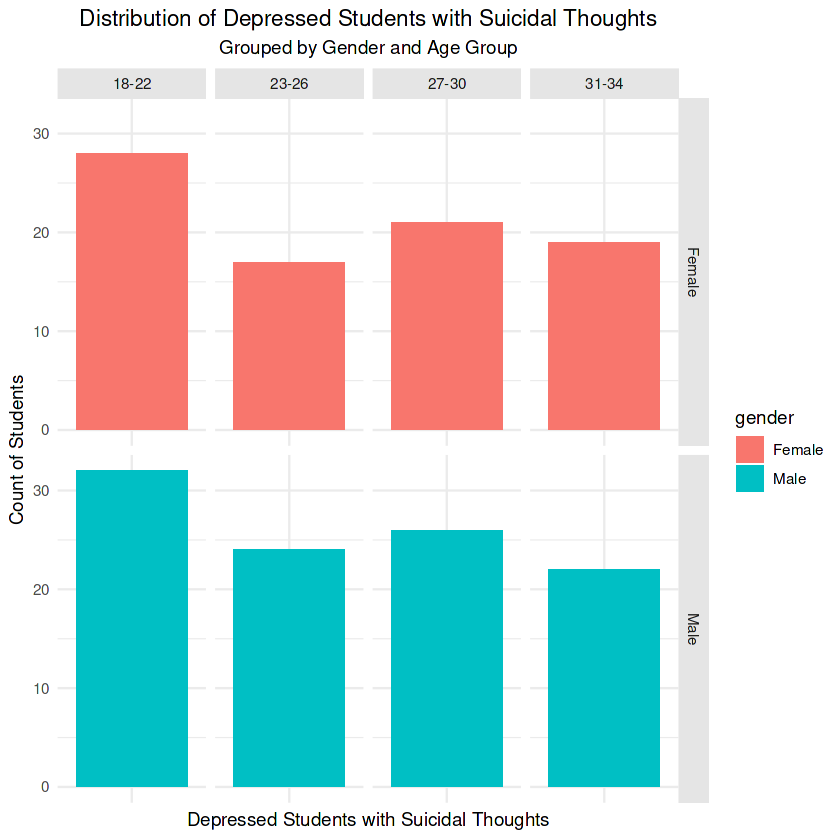

In [12]:
depression_clean %>%  
  filter(depression_suicidal == "Yes") %>%
  ggplot(aes(x = depression_suicidal, fill = gender)) +  # Color bars by gender
  geom_bar(position = "dodge") +  # Separate bars for each gender
  facet_grid(gender ~ age_group) +  # Grid facets by gender and age group
  labs(
      title = "Distribution of Depressed Students with Suicidal Thoughts",
      subtitle = "Grouped by Gender and Age Group",
      x = "Depressed Students with Suicidal Thoughts",  
      y = "Count of Students"
  ) +
  theme_minimal() +
  theme(
      plot.title = element_text(hjust = 0.5),  # Center title
      plot.subtitle = element_text(hjust = 0.5),  # Center subtitle
      axis.text.x = element_blank(),  # Remove x-axis tick labels
      axis.ticks.x = element_blank(),  # Remove x-axis ticks
      strip.background = element_rect(fill = "grey90", color = NA) # Grey background for facet names
  )


These plots highlight that the age 18–22 age group should be prioritized for mental health interventions, as they show the highest levels of depression and suicidal thoughts.

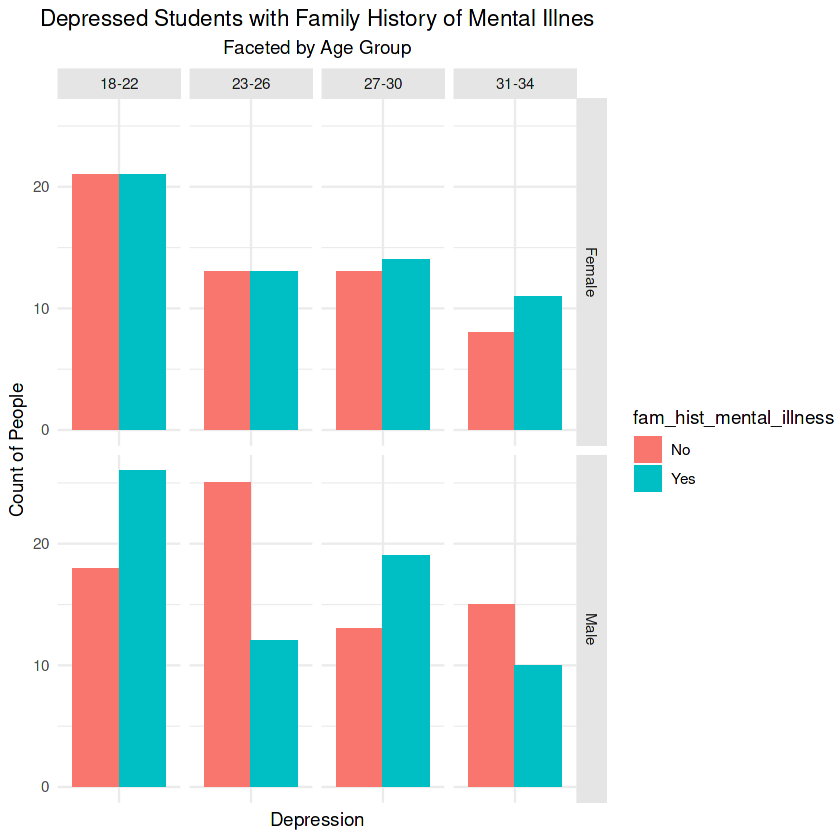

In [13]:
depression_clean %>% 
  filter(depression=="Yes") %>% 
  ggplot(aes(x = depression, fill=fam_hist_mental_illness)) +  # Color bars by depression status
  geom_bar(position = "dodge") +  # Use dodge position to separate the bars for each depression status
  facet_grid(gender~age_group) +
  labs(
      title = "Depressed Students with Family History of Mental Illnes",
      subtitle = "Faceted by Age Group",
      x = "Depression",
      y = "Count of People") +
theme_minimal()+
theme(
    plot.title = element_text(hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5), 
    axis.text.x = element_blank(),  # Remove x-axis tick labels
    axis.ticks.x = element_blank(),
    strip.background = element_rect(fill = "grey90", color = NA) # Grey background for facet names
)  

The plots do not reveal a clear relationship among females having depression and a family history of mental illness across different age groups. However, that is not the case for the male gender as in the age group from 18-22 and 27-30 most of the cases of depression also have a record of family metal illness.  This suggests that the presence of family history of mental illness is associated to depression among males, alas additional research should be conducted as factors beyond this may be implicated.

#### Sleep Duration Distribution in Depressed Students

In [14]:
# Count occurrences of sleep duration
sleep_count <- depression_clean %>%
  filter(depression =="Yes")%>%
  group_by(sleep_duration) %>%
  summarise(count_s = n())%>%
  mutate(percentage_s = (count_s / sum(count_s)) * 100)

# Display the count
print(sleep_count)

# A tibble: 4 × 3
  sleep_duration    count_s percentage_s
  <chr>               <int>        <dbl>
1 5-6 hours              64         25.4
2 7-8 hours              67         26.6
3 Less than 5 hours      64         25.4
4 More than 8 hours      57         22.6


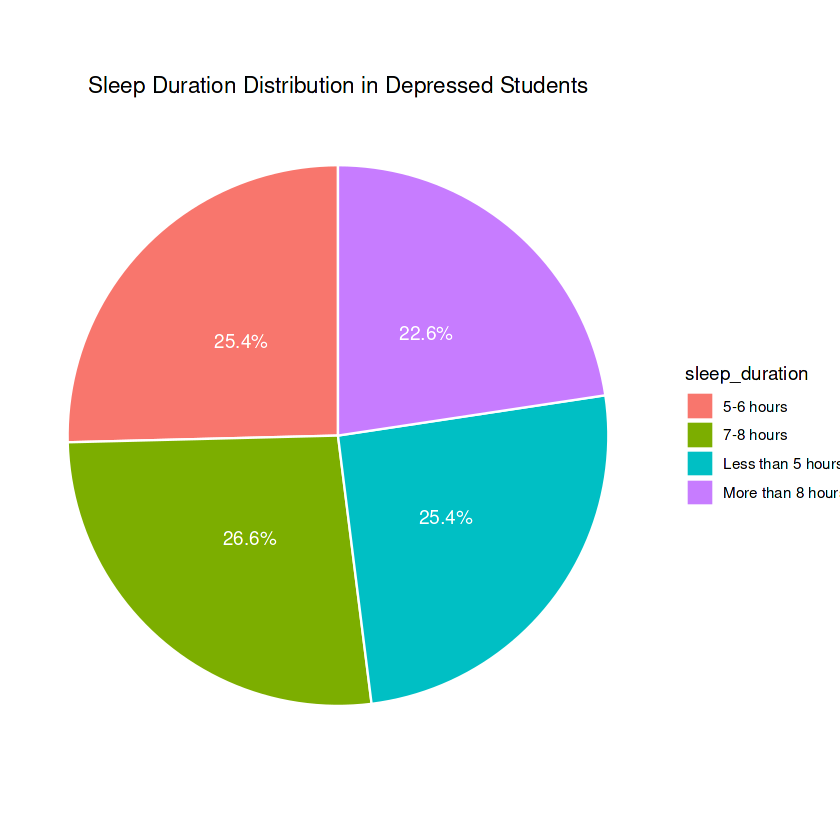

In [15]:
sleep_count %>% 
  ggplot(aes(x = "", y = percentage_s, fill = sleep_duration)) +   
  geom_col(width = 1, color = "white") +           
  coord_polar("y", start = 0) + 
  labs(
    title = "Sleep Duration Distribution in Depressed Students"
  ) +                
  theme_void() +                         
  theme(
    plot.title = element_text(hjust = 0.5)  
  ) +  
  geom_text(
    aes(label = paste0(round(percentage_s, 1), "%")),   
    position = position_stack(vjust = 0.5),   
    color = "white"
  )

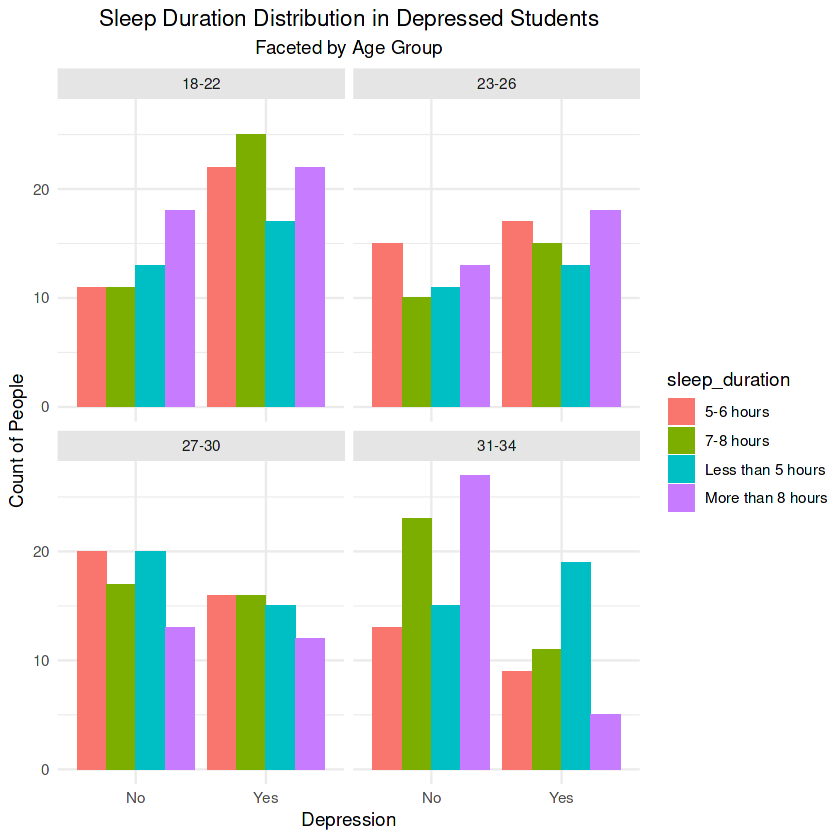

In [16]:
# Bar plot to visualize suicidal thoughts by depression status
depression_clean %>%  
  ggplot(aes(x = depression, fill = sleep_duration)) +  # Color bars by sleep duration
  geom_bar(position = "dodge") +  # Use dodge position to separate bars for each sleep duration
  facet_wrap(~age_group) +  # Create separate plots for each age group
  labs(
      title = "Sleep Duration Distribution in Depressed Students",
      subtitle = "Faceted by Age Group",
      x = "Depression",
      y = "Count of People"
  ) +
  theme_minimal() + 
  theme(
      plot.title = element_text(hjust = 0.5),  # Center the title
      plot.subtitle = element_text(hjust = 0.5),  # Center the subtitle
      strip.background = element_rect(fill = "grey90", color = NA) # Grey background for facet names
  )

The relatively equal distribution suggests that depression impacts young individuals in varied ways, contributing to both insufficient and excessive sleep patterns among students. However, in the 31-34 age group, non-depressed students show a noticeable concentration in the "7-8 hours" and "More than 8 hours" categories, indicating a more consistent sleep pattern. To better understand these trends, additional data and a further analysis are necessary.

#### Impact of Academic Pressure in Depression

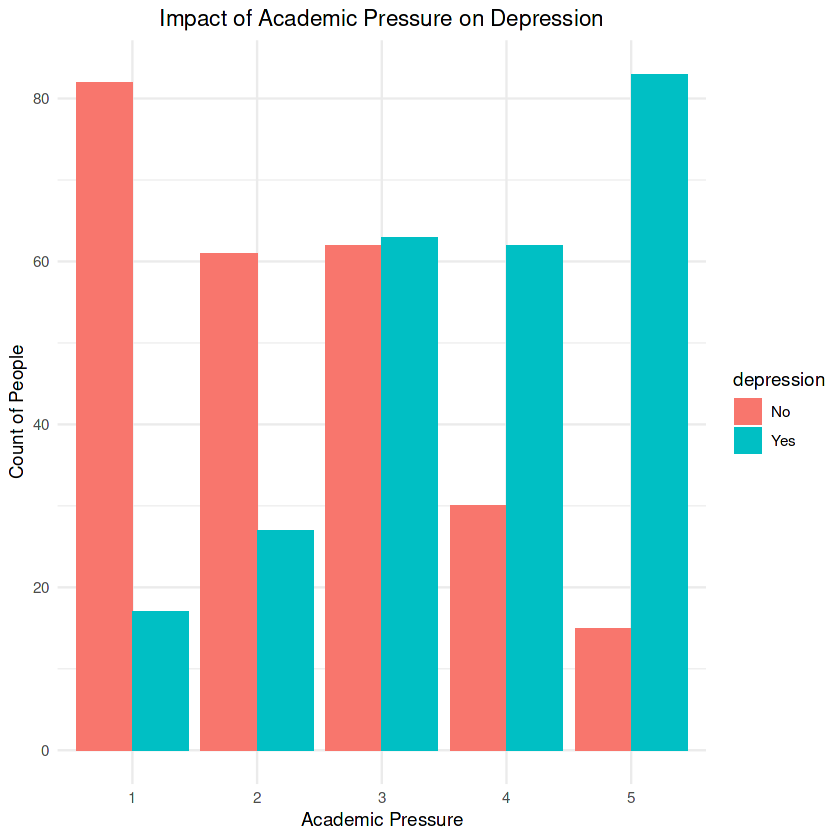

In [17]:
depression_clean %>%    
    ggplot(aes(x = academic_pressure, fill = depression)) +
    geom_bar(position = "dodge") +
    labs(
        title = "Impact of Academic Pressure on Depression",
        x = "Academic Pressure",
        y = "Count of People"
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(hjust = 0.5)
    )

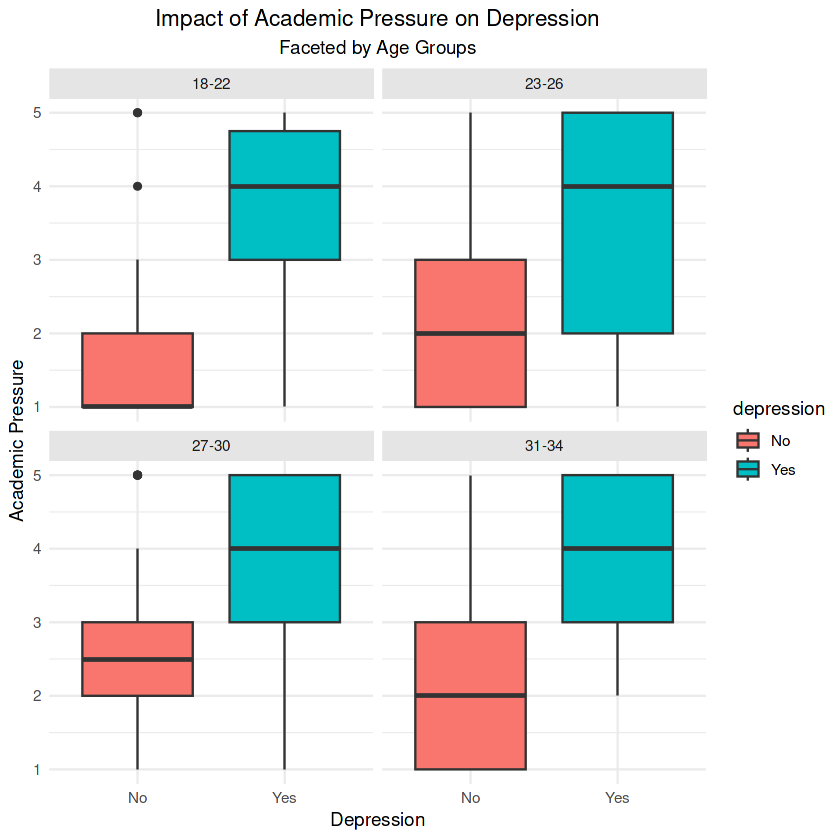

In [18]:
depression_clean %>%
  ggplot(aes(x = depression, y = as.numeric(academic_pressure), fill = depression)) +
  geom_boxplot() +
  facet_wrap(~ age_group) +
  labs(
    title = "Impact of Academic Pressure on Depression",
    subtitle = "Faceted by Age Groups",
    x = "Depression",
    y = "Academic Pressure"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    strip.background = element_rect(fill = "grey90", color = NA) # Grey background for facet names
  )

Academic pressure appears to be associated with depression, as higher levels of pressure are consistently observed among students reporting depression. This relation seems stronger in 18–22 and 23–26 age groups. In these groups, students reporting depression tend to experience higher levels of academic pressure (median ~4), while those without depression report much lower pressure (median ~2).

#### Impact of Academic Pressure in Depression, faceted by study satisfaction

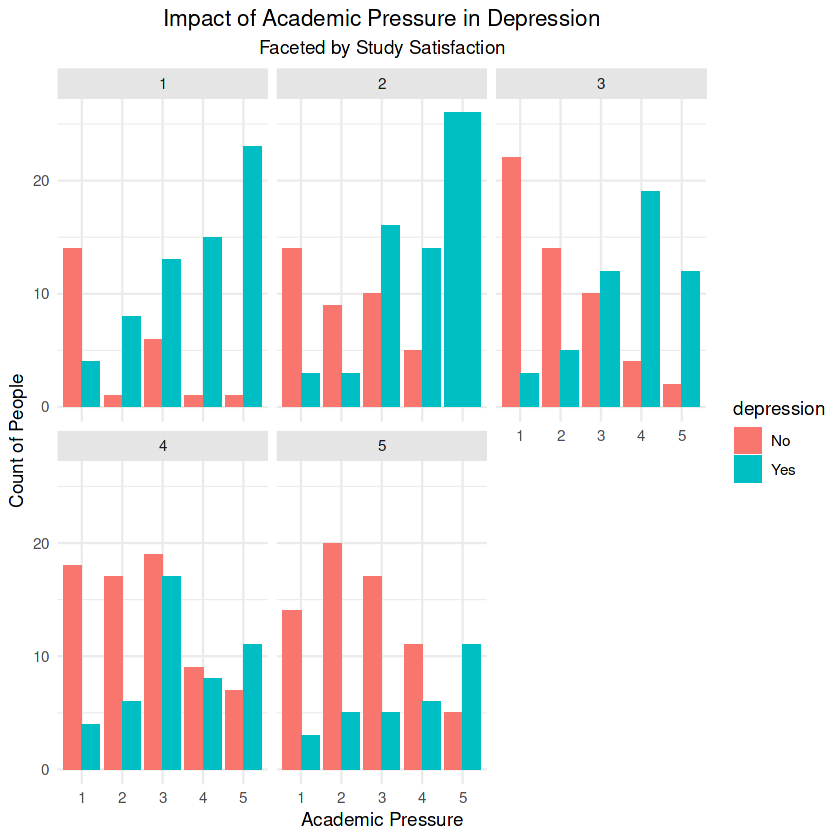

In [19]:
depression_clean %>%    
    ggplot(aes(x = academic_pressure,fill = depression)) +
    geom_bar(position = "dodge") +
    facet_wrap(~study_satisfaction) + 
    labs(
        title = "Impact of Academic Pressure in Depression",
        subtitle = "Faceted by Study Satisfaction",
        x = "Academic Pressure",
        y = "Count of People") +
    theme_minimal() +
    theme(
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        strip.background = element_rect(fill = "grey90", color = NA) # Grey background for facet names
    )

The previous plots reveal a noticeable increase in the number of students with depression at lower study satisfaction levels (1 and 2) and a rise in depressed students with a high level of academic pressure.

The amount of non-depressed students increase with a higher study satisfaction and less academic pressure.


##### Relationhip between Academic Pressure and Depression

###### Using Pearson's Chi-squared test 

In [20]:
table_data <- table(depression_clean$academic_pressure, depression_clean$depression)
print(table_data)
chi_sq_result <- chisq.test(table_data)
print(chi_sq_result)

# X-squared: Chi-squared statistic. 
# df: Degrees of freedom 
# p-value: Less than 0.05 suggests a significant association

   
    No Yes
  1 82  17
  2 61  27
  3 62  63
  4 30  62
  5 15  83

	Pearson's Chi-squared test

data:  table_data
X-squared = 114.13, df = 4, p-value < 2.2e-16



Chi-squared test is the most common way to test the association between two categorical variables. 

A large Chi-squared value (with a small p-value) suggests that there is a significant association between academic pressure and depression

#### Relationship between CGPA and Depression

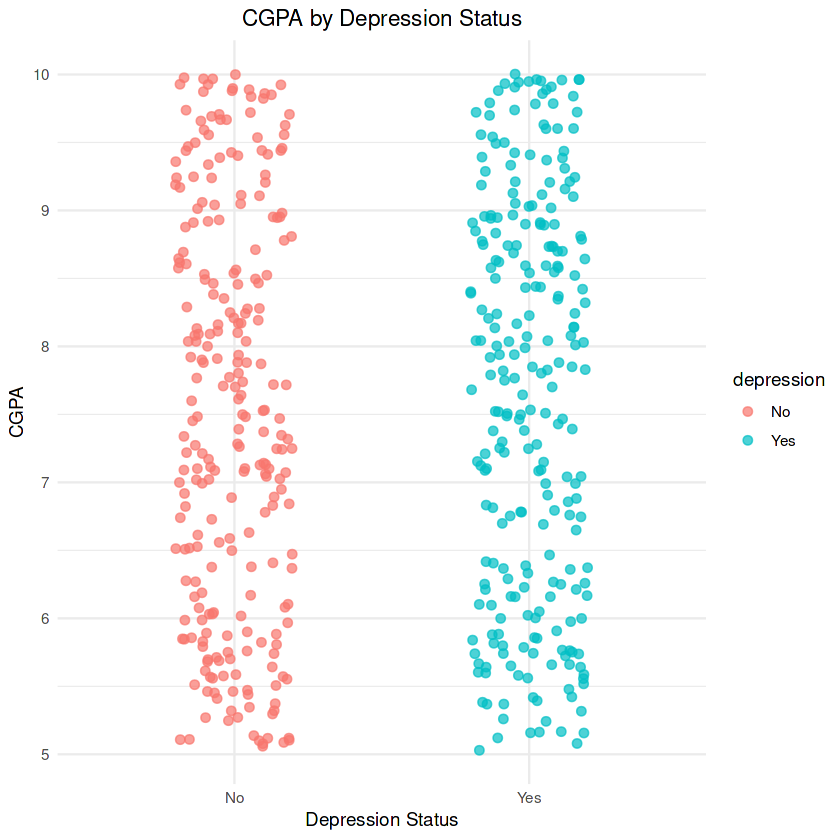

In [21]:
ggplot(depression_clean, aes(x = depression, y = cgpa, color = depression)) +
  geom_jitter(width = 0.2, size = 2, alpha = 0.7) + # Jittered points
  labs(
    title = "CGPA by Depression Status",
    x = "Depression Status",
    y = "CGPA"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5)
  )

The scatter plot indicates that CGPA does not appear to be a strong distinguishing factor for depression. Points are distributed across the entire range of CGPA values, from minimum to maximum, regardless of whether students are depressed or not.

#### Impact of Study hours on Depression

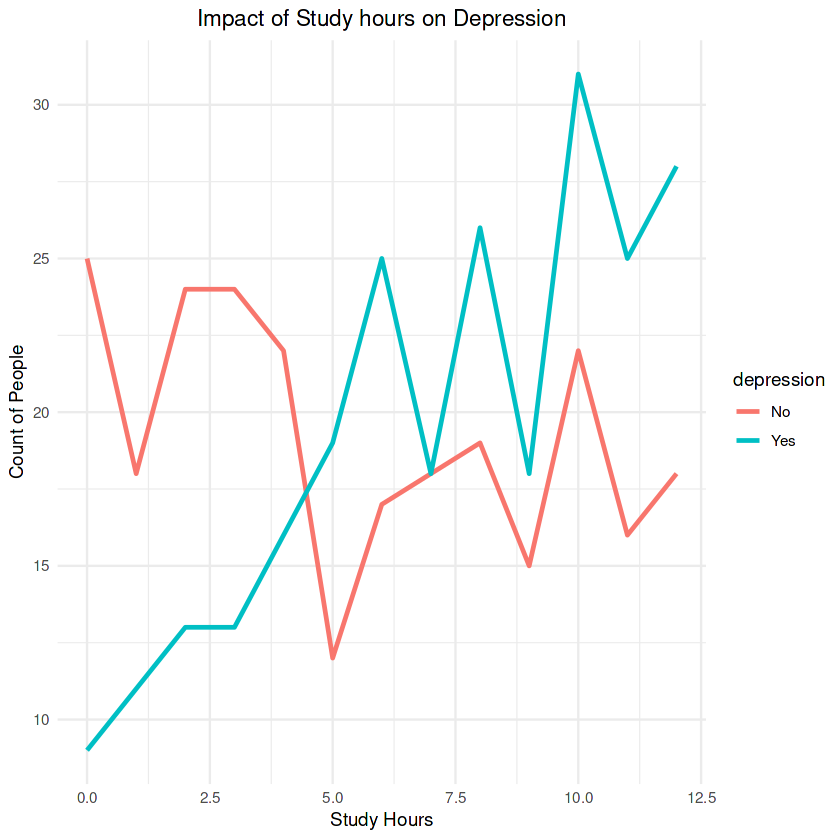

In [22]:
depression_clean %>% 
  ggplot(aes(x = study_hours,colour = depression)) +
  geom_line(stat = "count", aes(y = after_stat(count)), linewidth = 1)+
  labs(
      title = "Impact of Study hours on Depression",
      x = "Study Hours",
      y = "Count of People")+
  theme_minimal()+
  theme(
      plot.title = element_text(hjust = 0.5)
  ) 

This plot suggest that the number of depressed students increases with higher study hours. However, this cannot be considered a definitive indicator of depression, as there is also a significant number of students without depression who study very few or many hours. This indicates that other factors likely contribute to depression, and further analysis is needed to understand the full context.

#### Relationship of Dietary Habiits on Depression

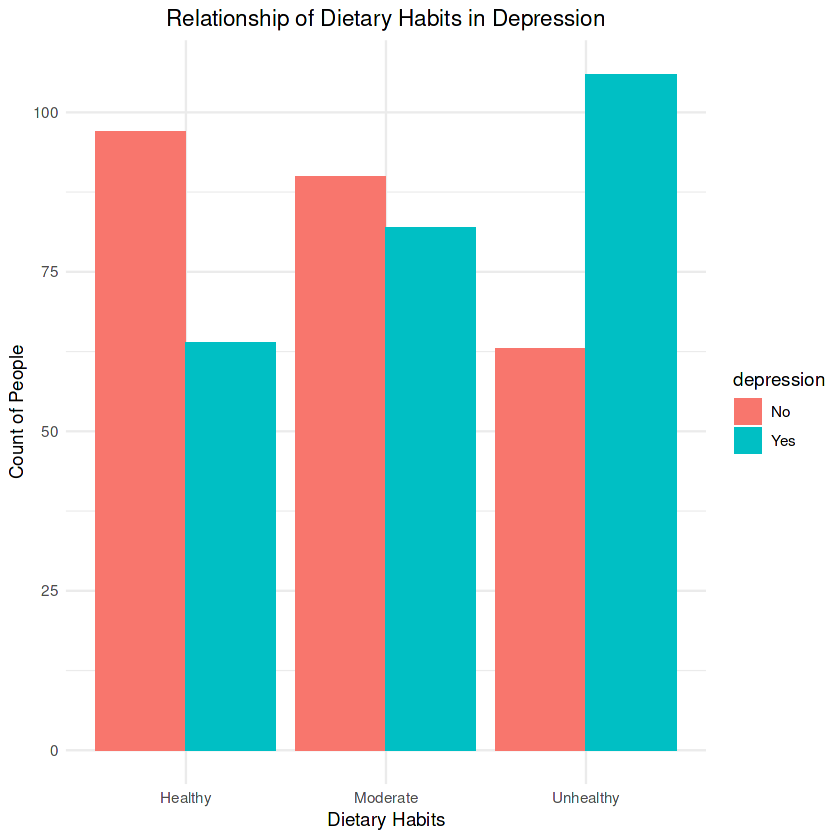

In [23]:
depression_clean %>%    
    ggplot(aes(x = dietary_habits,fill = depression)) +
    geom_bar(position = "dodge") +
    labs(
        title = "Relationship of Dietary Habits in Depression",
        x = "Dietary Habits",
        y = "Count of People") +
    theme_minimal()+ 
    theme(
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)
    ) 

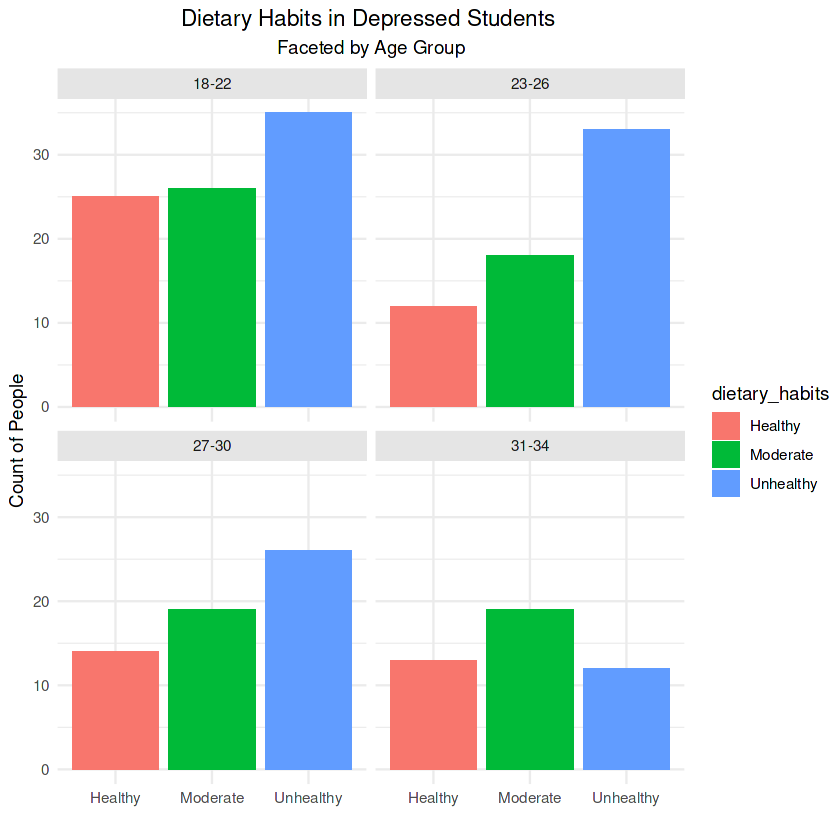

In [24]:
depression_clean %>%
  filter(depression =="Yes")%>%
  ggplot(aes(x = dietary_habits, fill = dietary_habits)) +
  geom_bar(position = "dodge") +  
  facet_wrap(~age_group) + 
  labs(
    title = "Dietary Habits in Depressed Students ",
    subtitle = "Faceted by Age Group",
    x = "",
    y = "Count of People"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    strip.background = element_rect(fill = "grey90", color = NA) # Grey background for facet names
  )

Plots reveal that students who report feeling depressed tend to have more unhealthy dietary habits, with the highest levels observed in the 18-22 age group. 

##### Relationhip between Dietary Habits and Depression

###### Using Pearson's Chi-squared test


In [25]:
table_dietary <- table(depression_clean$dietary_habits, depression_clean$depression)
print(table_dietary)
chi_sq_result_d <- chisq.test(table_dietary)
print(chi_sq_result_d)

# X-squared: Chi-squared statistic. 
# df: Degrees of freedom 
# p-value: Less than 0.05 suggests a significant correlation.

           
             No Yes
  Healthy    97  64
  Moderate   90  82
  Unhealthy  63 106

	Pearson's Chi-squared test

data:  table_dietary
X-squared = 18.069, df = 2, p-value = 0.0001192



The Pearson's Chi-squared test results indicates a significant association between the two categorical variables. This means that the type of diet (whether healthy, moderate, or unhealthy) might influence the likelihood of experiencing depression.

#### Impact of Finantial Stress on Dietary Habits in Depressed Students

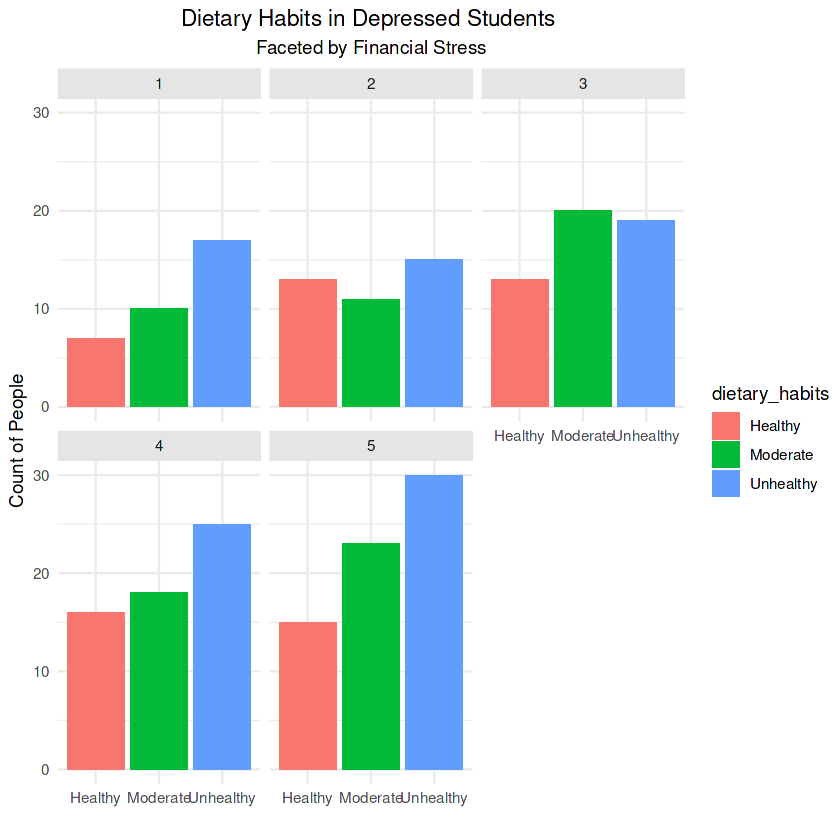

In [26]:
depression_clean %>%
  filter(depression =="Yes")%>%
  ggplot(aes(x = dietary_habits, fill = dietary_habits)) +
  geom_bar(position = "dodge") +  
  facet_wrap(~financial_stress) + 
  labs(
    title = "Dietary Habits in Depressed Students ",
    subtitle = "Faceted by Financial Stress",
    x = "",
    y = "Count of People"
  ) +
  theme_minimal()+
  theme(
    plot.title = element_text(hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    strip.background = element_rect(fill = "grey90", color = NA) # Grey background for facet names
  )

Here is shown that depressed students experiencing higher financial stress are more likely to adopt unhealthy dietary habits. This suggests a potential link between financial challenges and compromised nutritional choices, highlighting the need for targeted support to address both financial and mental health concerns.

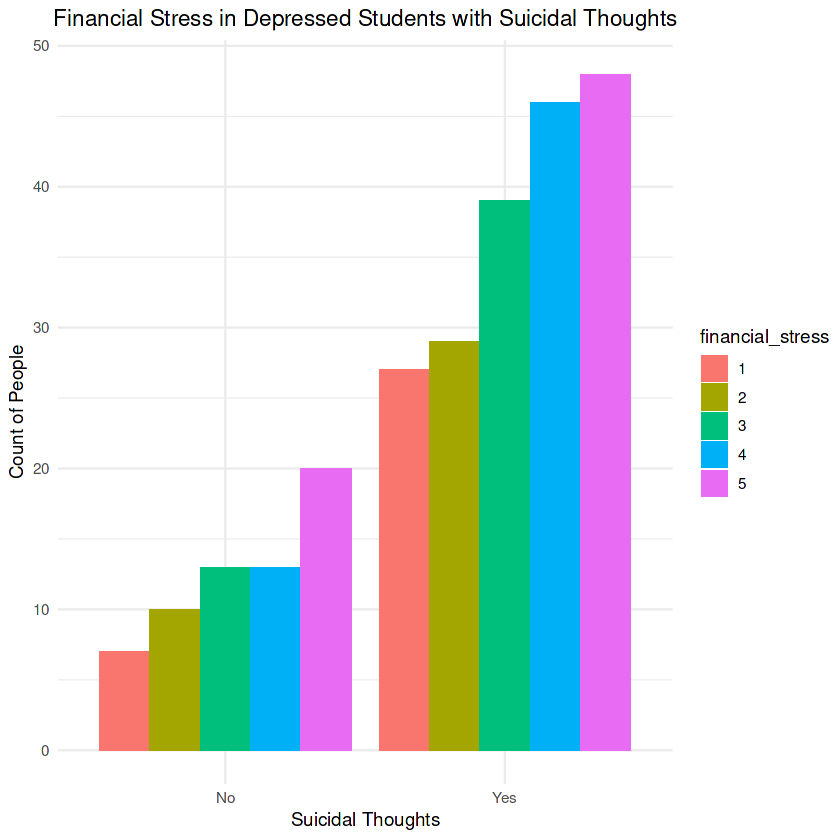

In [27]:
depression_clean %>%
filter(depression == "Yes") %>%
  ggplot(aes(x = suicidal_thoughts, fill = financial_stress)) +
  geom_bar(position = "dodge") +
 labs(
    title = "Financial Stress in Depressed Students with Suicidal Thoughts",
    x = "Suicidal Thoughts",
    y = "Count of People"
  ) +
  theme_minimal()+
  theme(
    plot.title = element_text(hjust = 0.5)
  )

In [28]:
table_financial_suicidal <- table(depression_clean$suicidal_thoughts, depression_clean$depression)
print(table_financial_suicidal)
chi_sq_result_fs <- chisq.test(table_financial_suicidal)
print(chi_sq_result_fs)

# X-squared: Chi-squared statistic. 
# df: Degrees of freedom 
# p-value: Less than 0.05 suggests a significant correlation.

     
       No Yes
  No  179  63
  Yes  71 189

	Pearson's Chi-squared test with Yates' continuity correction

data:  table_financial_suicidal
X-squared = 107.29, df = 1, p-value < 2.2e-16



The results provide strong evidence that financial stress is significantly associated with suicidal thoughts. This implies that interventions addressing financial stress could potentially have a positive effect on reducing the risk of suicidal thoughts among students.